# Cats and Dogs (Transfer Learning - VGG16)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

rows = 128
cols= 128

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os, shutil
# print(os.listdir("../input"))

In [2]:
source_data_dir = "../dogs_and_cats//train"
try:
    os.mkdir("../dogs_and_cats//training_set/cats")
    os.mkdir("../dogs_and_cats//training_set/dogs")
    os.mkdir("../dogs_and_cats//validation_set/cats")
    os.mkdir("../dogs_and_cats//validation_set/dogs")
except:
    pass

In [3]:
# if os.listdir("data/training_set/cats")=="":
#     # If the folder contains no pictures start copying
#     for file in ["cat.{}.jpg".format(i) for i in range (2000)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/training_set/cats", file))
#     for file in ["dog.{}.jpg".format(i) for i in range (2000)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/training_set/dogs", file))
#     for file in ["cat.{}.jpg".format(i) for i in range (2000, 2500)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/validation_set/cats", file))
#     for file in ["dog.{}.jpg".format(i) for i in range (2000, 2500)]:
#         shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/validation_set/dogs", file))

# Data Pre-processing

In [4]:
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
model = VGG16()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
model = VGG16(include_top=False)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [8]:
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.train = False

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.rmsprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

x_train_datagen = ImageDataGenerator(rescale=1./255)
x_val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = x_train_datagen.flow_from_directory("../dogs_and_cats/train",
                                                    target_size=(rows,cols),
                                                    batch_size=40,
                                                    class_mode='binary')

val_datagen = x_val_datagen.flow_from_directory("../dogs_and_cats//validation",
                                                target_size=(rows,cols),
                                                batch_size=40,
                                                class_mode='binary')



Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
epochs = 50

H = model.fit(train_datagen,
                            steps_per_epoch=100,
                            epochs=epochs,
                            validation_data=val_datagen,
                            validation_steps=50)


Epoch 1/50
100/100 [==============================] - 48s 485ms/step - loss: 0.6824 - acc: 0.5783 - val_loss: 0.5920 - val_acc: 0.7400
Epoch 2/50
100/100 [==============================] - 45s 452ms/step - loss: 0.5309 - acc: 0.7363 - val_loss: 0.5556 - val_acc: 0.6710
Epoch 3/50
100/100 [==============================] - 47s 469ms/step - loss: 0.3372 - acc: 0.8535 - val_loss: 0.1832 - val_acc: 0.9270
Epoch 4/50
100/100 [==============================] - 48s 479ms/step - loss: 0.2556 - acc: 0.8920 - val_loss: 0.1891 - val_acc: 0.9310
Epoch 5/50
100/100 [==============================] - 49s 486ms/step - loss: 0.1934 - acc: 0.9260 - val_loss: 0.1758 - val_acc: 0.9310
Epoch 6/50
100/100 [==============================] - 49s 485ms/step - loss: 0.1451 - acc: 0.9437 - val_loss: 0.1770 - val_acc: 0.9460
Epoch 7/50
100/100 [==============================] - 49s 485ms/step - loss: 0.1315 - acc: 0.9527 - val_loss: 0.1403 - val_acc: 0.9530
Epoch 8/50
100/100 [==============================] - 4

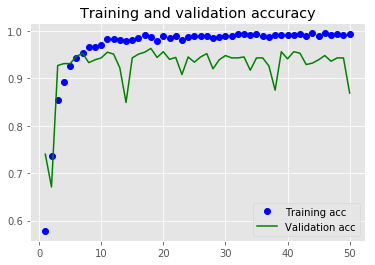

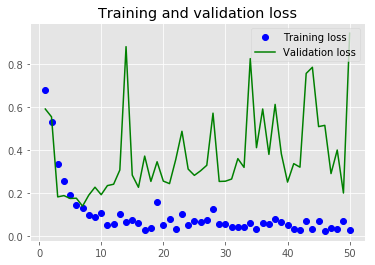

In [12]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

References:

1. [Anthony Tanbakuchi](http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/ )







